In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def make_fig(images, titles, plots, size):
    fig = plt.figure(figsize=size)
    for i in range(len(images)):
        fig.add_subplot(plots[0], plots[1], i+1)
        plt.imshow(images[i])
        plt.title(titles[i])
    plt.show()

def make_fig_gray(images, titles, plots, size):
    fig = plt.figure(figsize=size)
    for i in range(len(images)):
        fig.add_subplot(plots[0], plots[1], i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
    plt.show()

In [3]:
dog_path = 'C:\\Users\\Muhammad Tarek\\Downloads\\doggy.jpg'
dog_image = cv2.imread(dog_path)
coins_path = 'C:\\Users\\Muhammad Tarek\\Downloads\\coins.webp'
coins_image = cv2.imread(coins_path)

# Edge Detection
The algorithms to implement edge detection vary, but the idea behind it is as follows:
1. Get the value of a given pixel
2. compute the intensity gradient of the nighbouring pixels
3. if it passes a given threshold (or the algorithm figure it itself) then it's an edge


## Types of Edge Detection
- Laplacian
- Sobel
- Canny

## Laplacian

In [4]:
lap = cv2.Laplacian(cv2.cvtColor(dog_image, cv2.COLOR_BGR2GRAY), cv2.CV_64F)
print(lap)

[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.  -2. ...   0.   0.   0.]
 [ -1.  -2.   2. ...   2.   0.   0.]
 ...
 [  7.  -3.  -9. ...  -4.   2.   7.]
 [ -3.   5.   9. ...   7.   1. -12.]
 [ -2.   2.   4. ...   2.   4.  -6.]]


In [5]:
lap = np.uint8(np.absolute(lap))

In [6]:
print(lap)

[[ 0  0  0 ...  0  0  0]
 [ 0  0  2 ...  0  0  0]
 [ 1  2  2 ...  2  0  0]
 ...
 [ 7  3  9 ...  4  2  7]
 [ 3  5  9 ...  7  1 12]
 [ 2  2  4 ...  2  4  6]]


In [7]:
coins_gray = cv2.cvtColor(coins_image, cv2.COLOR_BGR2GRAY)
lap = cv2.Laplacian(coins_gray, cv2.CV_64F)
lap = np.uint8(np.absolute(lap))

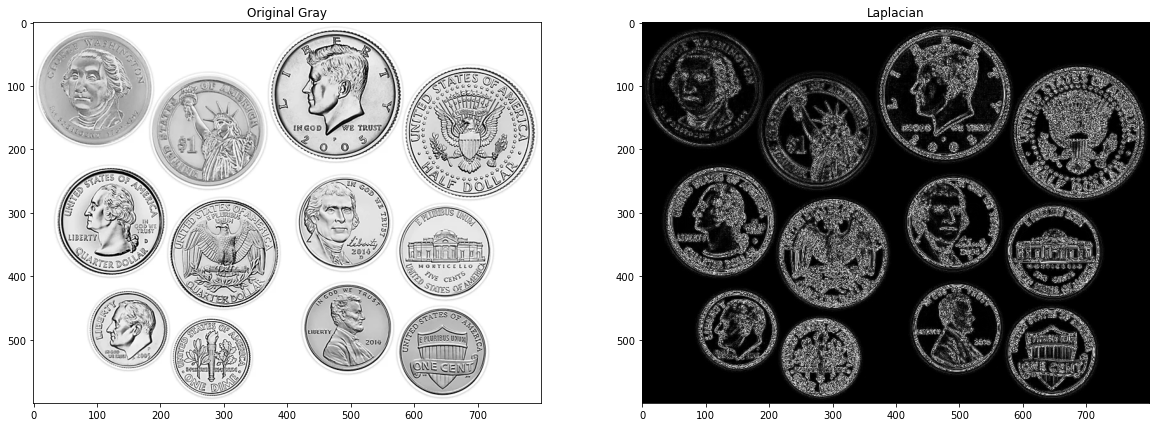

In [8]:
plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.imshow(coins_gray, cmap='gray')
plt.title('Original Gray')
plt.subplot(122)
plt.imshow(lap, cmap='gray')
plt.title('Laplacian')
plt.show()

## Sobel

In [9]:
sobel_x = cv2.Sobel(coins_gray, cv2.CV_64F, 1, 0)
sobel_y = cv2.Sobel(coins_gray, cv2.CV_64F, 0, 1)

In [10]:
print(sobel_x)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [11]:
sobel_x = np.uint8(np.absolute(sobel_x))
sobel_y = np.uint8(np.absolute(sobel_y))

In [12]:
sobel_combined = cv2.bitwise_or(sobel_x, sobel_y)

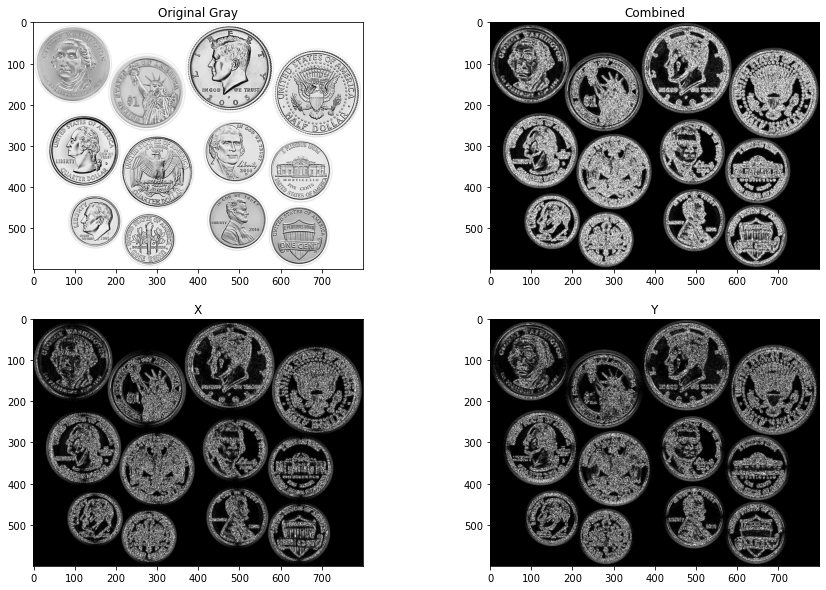

In [13]:
plt.figure(figsize=(15, 10))
plt.subplot(221)
plt.imshow(coins_gray, cmap='gray')
plt.title('Original Gray')
plt.subplot(222)
plt.imshow(sobel_combined, cmap='gray')
plt.title('Combined')
plt.subplot(223)
plt.imshow(sobel_x, cmap='gray')
plt.title('X')
plt.subplot(224)
plt.imshow(sobel_y, cmap='gray')
plt.title('Y')
plt.show()

## Canny
value > threshold2 -> Edge\
value < threshold1 -> Non-Edge\
threshold1 < value < threshold2 -> maybe

In [14]:
coins_blurred = cv2.GaussianBlur(coins_gray, (5, 5), 0)
coins_canny = cv2.Canny(coins_blurred, 30, 150)

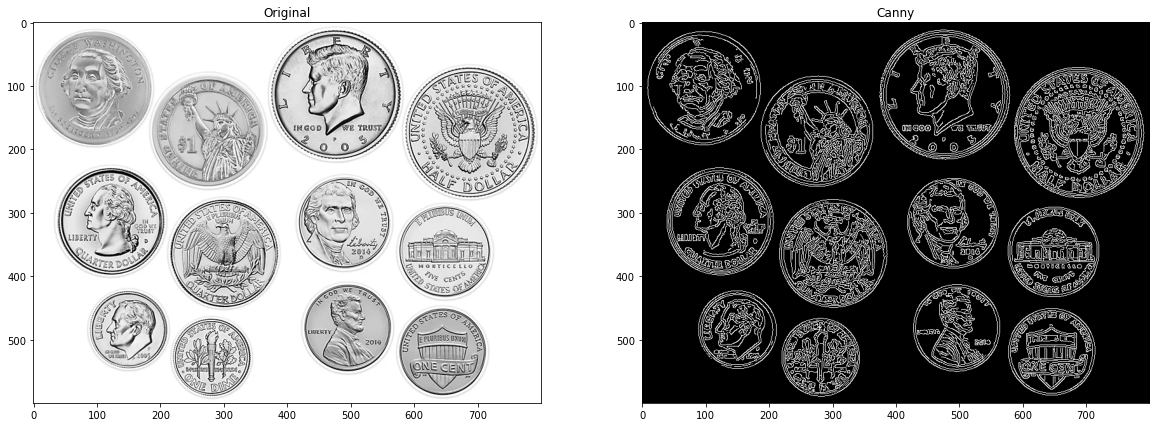

In [15]:
plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.imshow(coins_gray, cmap='gray')
plt.title('Original')
plt.subplot(122)
plt.imshow(coins_canny, cmap='gray')
plt.title('Canny')
plt.show()

lower: 100, upper: 187, med_val: 144.0


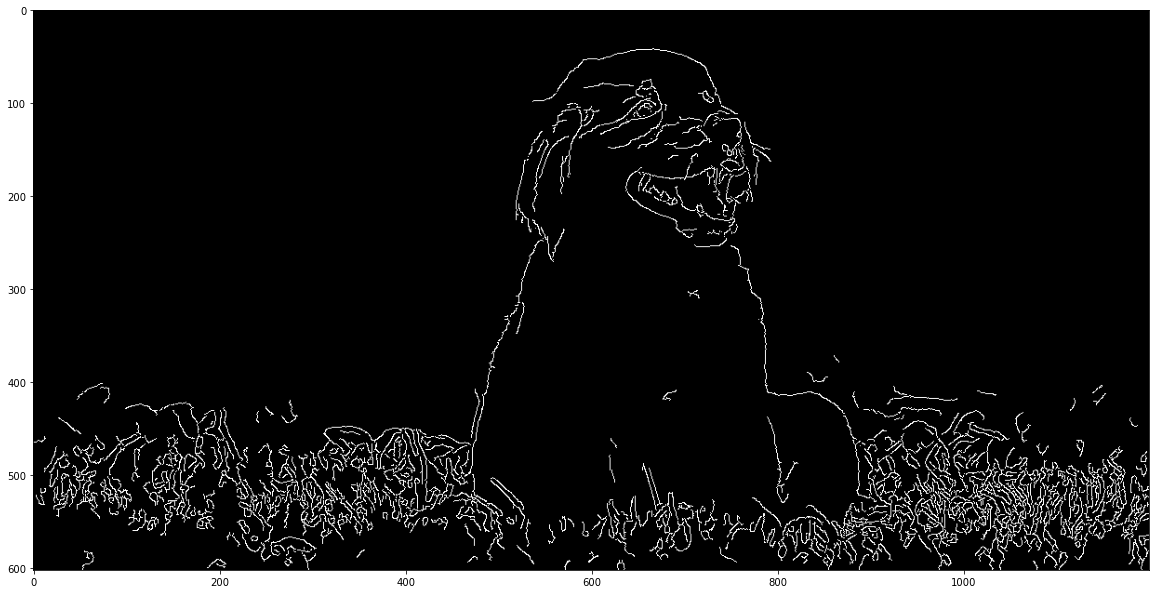

In [87]:
dog_gray = cv2.cvtColor(dog_image, cv2.COLOR_BGR2GRAY)
dog_blurred = cv2.blur(dog_image, (5, 5))

med_val = np.median(dog_image)
lower = int(max(0, 0.7*med_val))
upper = int(min(255, 1.3*med_val))

dog_canny = cv2.Canny(dog_blurred, 30, 100)

print('lower: {}, upper: {}, med_val: {}'.format(lower, upper, med_val))
plt.figure(figsize=(20, 20))
plt.imshow(dog_canny, cmap='gray')
plt.show()

lower: 170, upper: 255, med_val: 244.0


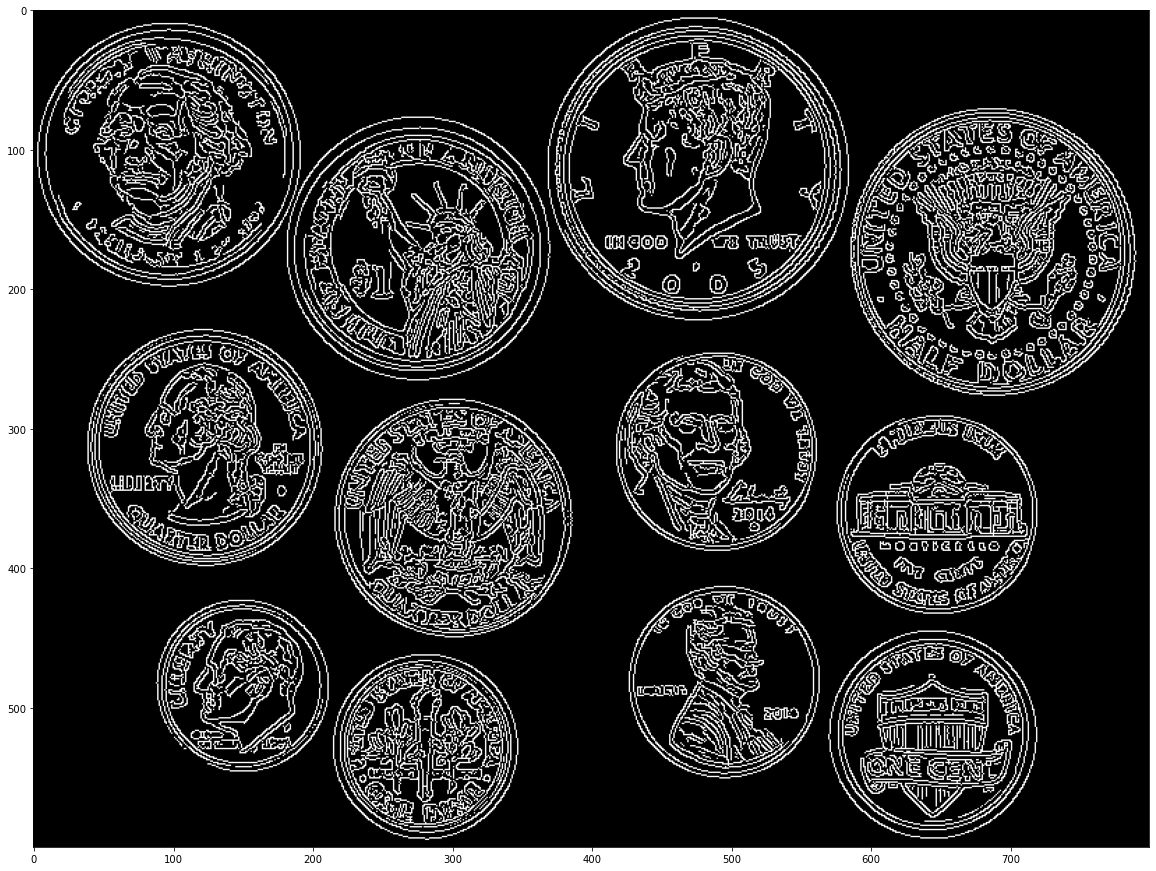

In [105]:
coins_image = cv2.imread(coins_path)
coins_image = cv2.cvtColor(coins_image, cv2.COLOR_BGR2RGB)
coins_gray = cv2.cvtColor(coins_image, cv2.COLOR_RGB2GRAY)

med_val = np.median(coins_image)
lower = int(max(0, 0.7*med_val))
upper = int(min(255, 1.3*med_val))

coins_bluured = cv2.GaussianBlur(coins_gray, (5, 5), 0)

final = coins_bluured

coins_canny = cv2.Canny(final, 30, 100)

print('lower: {}, upper: {}, med_val: {}'.format(lower, upper, med_val))

plt.figure(figsize=(20, 20))
plt.imshow(coins_canny, cmap='gray')
plt.show()

# Contours
The Idea behind contours is that get an edged image and finds the contour of it, then return number of contours and its hierarchy.

Also you can find the outer shape of an object like its area, height, width. for example can find if the shape is either circle of square.

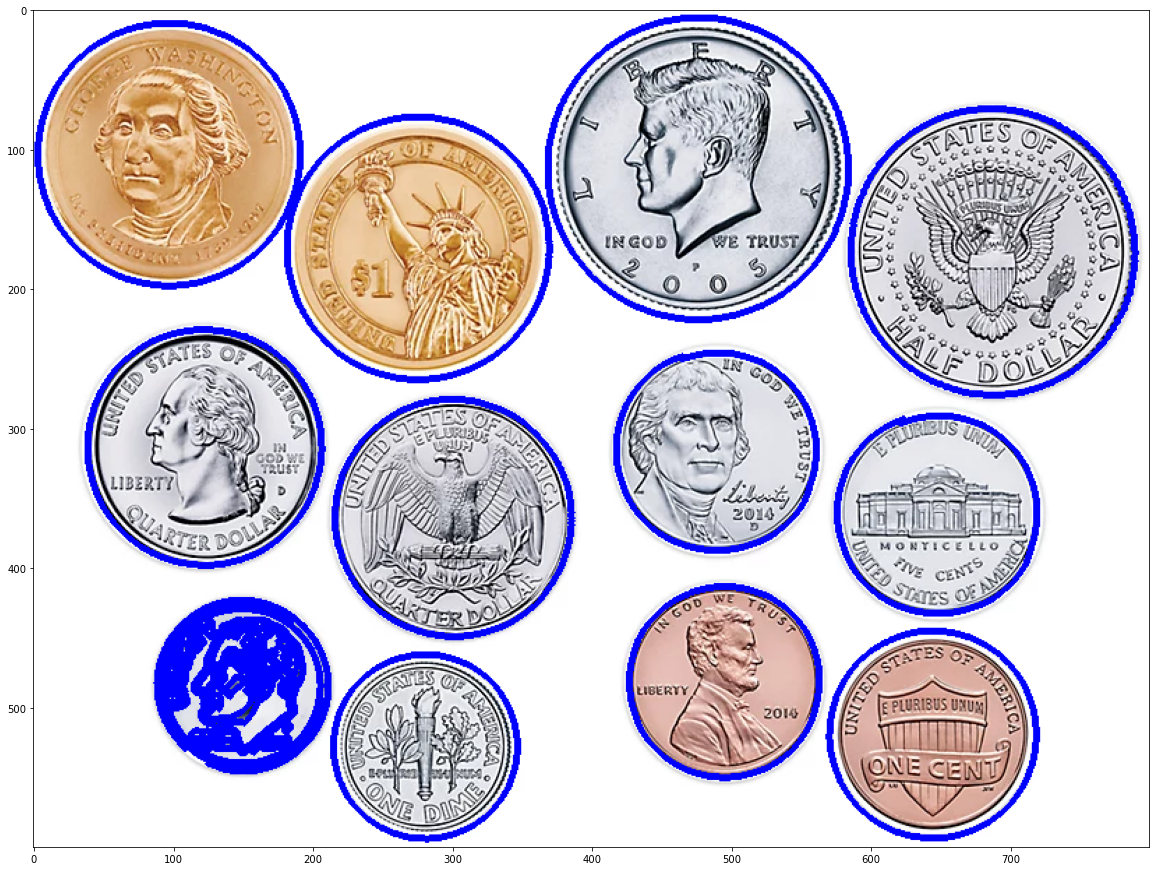

In [106]:
cnt, h = cv2.findContours(coins_canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(coins_image, cnt, -1, (0, 0, 255), 4)

plt.figure(figsize=(20, 20))
plt.imshow(coins_image)
plt.show()

# Masking
To mask an image is to get a specified region only of it

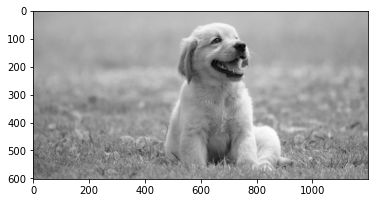

In [17]:
dog_gray = cv2.cvtColor(dog_image, cv2.COLOR_BGR2GRAY)
plt.imshow(dog_gray, cmap='gray')

In [18]:
mask = np.zeros(dog_image.shape[:2], dtype='uint8')

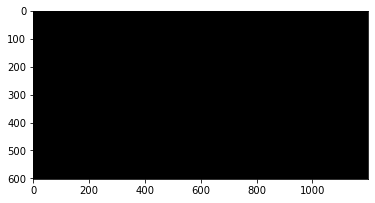

In [19]:
plt.imshow(mask, cmap='gray')

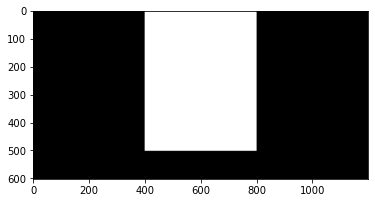

In [20]:
cv2.rectangle(mask, (400, 0), (800, 500), (255, 255, 255), -1)
plt.imshow(mask, cmap='gray')

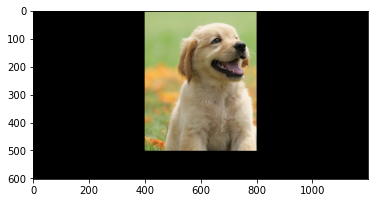

In [21]:
result = cv2.bitwise_and(dog_image, dog_image, mask=mask)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))

# Color Spaces
There are many different color spaces, the one we already be using is BGR or RGB Color space.\
The images itself consists of 3 different color channels here, Blue, Green and Red.\
if we want get every channel individually we do the following.

In [22]:
b, g, r = cv2.split(dog_image)
cv2.imshow("Original", dog_image)
cv2.waitKey(0)
cv2.imshow('Blue', b)
cv2.imshow('Green', g)
cv2.imshow('Red', r)
cv2.waitKey(0)

merged = cv2.merge([b, g, r])
cv2.imshow('Merged', merged)
cv2.waitKey(0)

cv2.destroyAllWindows()

In [23]:
zeros = np.zeros(dog_image.shape[:2], dtype='uint8')
cv2.imshow("Red", cv2.merge([zeros, zeros, r]))
cv2.imshow("Green", cv2.merge([zeros, g, zeros]))
cv2.imshow("Blue", cv2.merge([b, zeros, zeros]))
cv2.waitKey(0)
cv2.destroyAllWindows()

There are more color channels like:
- HSV
- LAB
- HLS\
and many more. We'll focus on HSV more because it's more similar to the way human eye looks
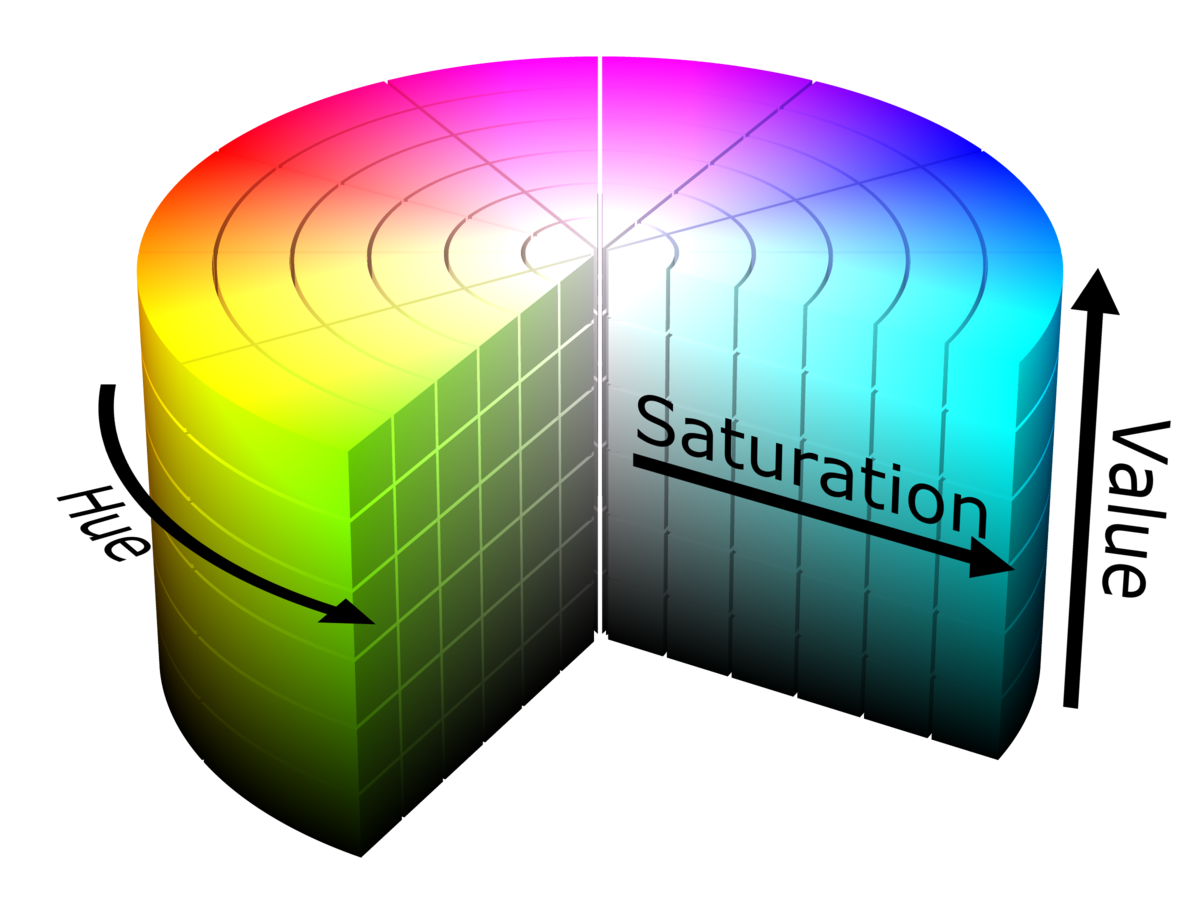

In [24]:
hsv = cv2.cvtColor(dog_image, cv2.COLOR_BGR2HSV)
lab = cv2.cvtColor(dog_image, cv2.COLOR_BGR2LAB)
hls = cv2.cvtColor(dog_image, cv2.COLOR_BGR2HLS)

In [25]:
cv2.imshow('Original', dog_image)
cv2.imshow('HSV', hsv)
cv2.imshow('LAB', lab)
cv2.imshow('HLS', hls)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [26]:
cv2.imshow('Image', dog_image)
cv2.waitKey(0)

27

In [27]:
dog_hsv = cv2.cvtColor(dog_image, cv2.COLOR_BGR2HSV)
cv2.imshow('Dog HSV', dog_hsv)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [28]:
# def nothing(x):
#     pass

# cv2.namedWindow('Bars')
# cv2.createTrackbar('HMin', 'Bars', 0, 179, nothing)
# cv2.createTrackbar('HMax', 'Bars', 179, 179, nothing)
# cv2.createTrackbar('SMin', 'Bars', 0, 255, nothing)
# cv2.createTrackbar('SMax', 'Bars', 255, 255, nothing)
# cv2.createTrackbar('VMin', 'Bars', 0, 255, nothing)
# cv2.createTrackbar('VMax', 'Bars', 255, 255, nothing)

# while True:
    
#     dog_hsv = cv2.cvtColor(dog_image, cv2.COLOR_BGR2HSV)
#     lower = np.array([(cv2.getTrackbarPos('HMin', 'Bars'), cv2.getTrackbarPos('SMin', 'Bars'), cv2.getTrackbarPos('VMin', 'Bars'))])
#     upper = np.array([(cv2.getTrackbarPos('HMax', 'Bars'), cv2.getTrackbarPos('SMax', 'Bars'), cv2.getTrackbarPos('VMax', 'Bars'))])
    
#     mask = cv2.inRange(dog_hsv, lower, upper)
#     result = cv2.bitwise_and(dog_image, dog_image, mask=mask)
    
    
#     cv2.imshow('Mask', mask)
#     cv2.imshow('Result', result)
#     k = cv2.waitKey(1)
#     if  k == 27:
#         break

# cv2.destroyAllWindows()

# Video
It's the same idea like reading an image, but it requires a while loop to read every frame of a camera

In [29]:
# cap = cv2.VideoCapture(0)

# while True:
#     ret, frame = cap.read()
    
#     cv2.imshow('Camera', frame)
    
#     k = cv2.waitKey(1)
    
#     if k == 27:
#         break

# cv2.destroyAllWindows()
# cap.release